In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import dlib
%matplotlib inline

In [2]:
root = "D:/College Work/Internship/IIIT-A/Code/FacialDataFrame/927_0200_01/"
root

'D:/College Work/Internship/IIIT-A/Code/FacialDataFrame/927_0200_01/'

In [3]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(root):
    for file in f:
        files.append(os.path.join(r, file))

In [4]:
files[5]

'D:/College Work/Internship/IIIT-A/Code/FacialDataFrame/927_0200_01/frame1001.jpg'

In [5]:
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
files[439]

'D:/College Work/Internship/IIIT-A/Code/FacialDataFrame/927_0200_01/frame439.jpg'

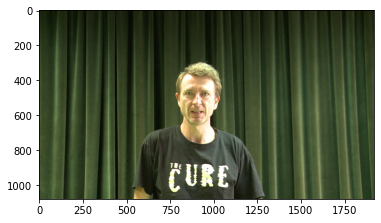

In [6]:
img = cv2.imread(files[439])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

807 485
809 512
812 539
815 565
823 590
837 612
855 630
877 641
902 645
929 642
954 632
974 615
989 595
998 572
1002 546
1005 521
1007 495
824 467
838 454
857 449
878 450
897 455
914 456
933 452
953 452
972 458
987 469
907 477
906 494
906 511
905 528
884 541
894 545
905 549
916 546
926 542
844 479
854 471
868 472
880 482
867 484
854 484
932 484
942 474
956 474
967 482
956 487
943 486
869 581
884 576
898 573
906 575
915 573
929 577
943 582
928 592
915 597
906 598
897 597
884 592
875 581
897 580
906 581
915 580
937 581
915 587
906 588
898 587


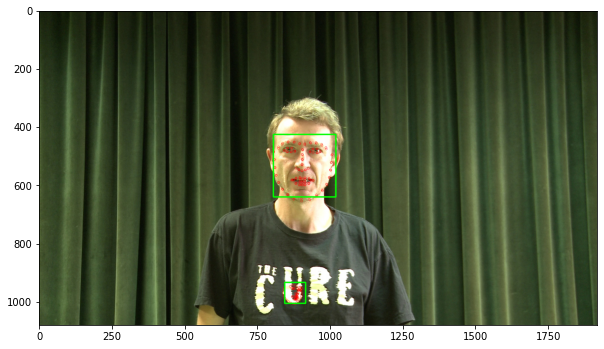

Wall time: 2.07 s


In [34]:
%%time
li = []
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
plt.figure(figsize=(10,8))
faces = detector(img)
for face in faces:
    arr = []
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    
    landmarks = predictor(img,face)
    
    for n in range(0,68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(img,(x,y),4,(255,0,0),1)
        print(x,y)
        li = [x,y]
        arr.append(li)
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)

plt.imshow(img)
plt.show()

In [35]:
faces

rectangles[[(806, 424) (1021, 639)]]

In [36]:
bool(faces)

True

In [37]:
from scipy.spatial.distance import pdist
len(arr)

68

In [38]:
print(arr)

[[807, 485], [809, 512], [812, 539], [815, 565], [823, 590], [837, 612], [855, 630], [877, 641], [902, 645], [929, 642], [954, 632], [974, 615], [989, 595], [998, 572], [1002, 546], [1005, 521], [1007, 495], [824, 467], [838, 454], [857, 449], [878, 450], [897, 455], [914, 456], [933, 452], [953, 452], [972, 458], [987, 469], [907, 477], [906, 494], [906, 511], [905, 528], [884, 541], [894, 545], [905, 549], [916, 546], [926, 542], [844, 479], [854, 471], [868, 472], [880, 482], [867, 484], [854, 484], [932, 484], [942, 474], [956, 474], [967, 482], [956, 487], [943, 486], [869, 581], [884, 576], [898, 573], [906, 575], [915, 573], [929, 577], [943, 582], [928, 592], [915, 597], [906, 598], [897, 597], [884, 592], [875, 581], [897, 580], [906, 581], [915, 580], [937, 581], [915, 587], [906, 588], [898, 587]]


In [ ]:
pdist(arr) # Euclidean distance

In [ ]:
len(pdist(arr))

In [ ]:
a = pdist([[0,0]] * 68)
a

In [19]:
arr1 = arr[0:68]

In [20]:
arr2 = arr[68:136]

In [23]:
arr == arr1 + arr2

True

In [26]:
pr1 = pdist(arr1)

In [27]:
pr2 = pdist(arr2)

In [28]:
pr = pdist(arr)

In [33]:
len(pr1) + len(pr2)

4556